In [1]:
# Load MNIST database

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [61]:
[print(v) for i, v in enumerate(mnist.items()) if i < 5]

('data', array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]))
('target', array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))
('frame', None)
('categories', {})
('feature_names', ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58

[None, None, None, None, None]

In [2]:
# Examine shape of two dictionary keys: data and target

X, y = mnist['data'], mnist['target']

X.shape # 70,000 images, 784 features
y.shape # 70,000 images

(70000,)

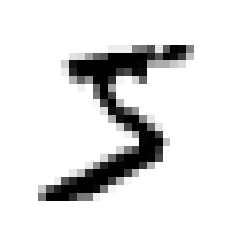

numpy.ndarray

In [3]:
# Each image is 28 x 28 pixels (784 features)
# each feature represents one pixel's intensity (0 - 255)

# To see one digit from the dataset
# Grab an instance's feature vector, reshape to a 28 * 28 array (matrix)
# display using Matplotlib

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# an array of 784 features
some_digit = X[0]

# turn into image: reshape into 28 x 28 array
some_digit_image = some_digit.reshape(28, 28)

# plot using imshow() function from matplotlib
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

# label of image '5'
y[0]

# most ML algorithms want numbers instead of strings
# turn into numpy ndarray
y = y.astype(np.uint8)
type(y)

In [4]:
# Create test set and set it aside BEFORE inspecting data
# MNIST already split - training set (first 60k images), testing set (last 10k images)

# Compare numpy.ndarray
# X[:60000].shape  (60000, 784)
# X[60000:].shape  (10000, 784)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [12]:
#########################
##### FAST VERSION  ##### 
#########################


# X, y = mnist['data'], mnist['target']
# FULL DATASET: X 70,000 images, 784 features
# Full dataset; y 70,000 images

# For faster resolution - Training (2000), Testing (200)

#X[:2000].shape
#X[69800:].shape


X_train1, X_test1, y_train1, y_test1 = X[:2000], X[69800:], y[:2000], y[69800:]
print("Setup complete.")


Setup complete.


In [5]:
# TRAINING a Binary Classifier, 5 and not-5

# create target vectors
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [13]:
#########################
##### FAST VERSION  ##### 
#########################

# Training a Binary Classifier, 5 and not-5

# create target vectors
y_train_5f = (y_train1 == 5)
y_test_5f = (y_test1 == 5)
print("create target vectors for fast version")

create target vectors for fast version


In [6]:
# Pick a classifier - Stochastic Gradient Descent (SGD)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
#########################
##### FAST VERSION  ##### 
#########################

# Pick a classifier - Stochastic Gradient Descent (SGD)


from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train1, y_train_5f)
print("note parameters used to fit model are for the fast version")

note parameters used to fit model are for the fast version


In [15]:
# Once trained, use it to detect images of number 5
# use some_digit created from above

sgd_clf.predict([some_digit])

array([ True])

In [8]:
# Use Scikit Learn's cross_val_score() to evaluate the fitted SGDClassifier model
# use 3-fold cross-validation
# metric: accuracy 
# above 95% accuracy!

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [16]:
#########################
##### FAST VERSION  ##### 
#########################

# Use Scikit Learn's cross_val_score() to evaluate the fitted SGDClassifier model
# use 3-fold cross-validation
# metric: accuracy 
# above 95% accuracy!

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train1, y_train_5f, cv=3, scoring='accuracy')

array([0.95802099, 0.94452774, 0.95045045])

In [9]:
# Why 'accuracy' is not the preferred metric for Classifier
# compare SGDClassifier performance against BaseEstimator model
# this model just classifies everything as not-5

# note: this basic model scores above 90% accuracy (so accuracy may not be the best measure for classifier)
# especially for skewed datasets

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')


array([0.91125, 0.90855, 0.90915])

In [29]:
# Confusion Matrix (preferred over accuracy metric)

# to calc confusion matrix, need a set of predictions to compare to actual targets
from sklearn.model_selection import cross_val_predict

# instead of return evaluation metrics like cross_val_score, cross_val_predict returns
# actual predictions made on each fold

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred


array([ True, False, False, ...,  True, False, False])

In [17]:
#########################
##### FAST VERSION  ##### 
#########################

# Confusion Matrix

# to calc confusion matrix, need a set of predictions to compare to actual targets
from sklearn.model_selection import cross_val_predict

y_train_pred_f = cross_val_predict(sgd_clf, X_train1, y_train_5f, cv=3)
y_train_pred_f




array([False, False, False, ...,  True, False, False])

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

# True Negative: Correct classified as non-5 (53892)
# False Positives: Wrongly classified as 5   (687)

# False Negatives: Wrongly classified as non-5   (1891)
# True Positives: Correctly classified as 5    (3530)

array([[53892,   687],
       [ 1891,  3530]])

In [18]:
#########################
##### FAST VERSION  ##### 
#########################

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5f, y_train_pred_f)


# True Negative: Correct classified as non-5 (1777)
# False Positives: Wrongly classified as 5   (43)

# False Negatives: Wrongly classified as non-5   (55)
# True Positives: Correctly classified as 5    (125)



array([[1777,   43],
       [  55,  125]])

In [12]:
# Confusion Matrix
# row = actual class
# column = predicted class

# what a perfect prediction looks like
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [36]:
# Precision and Recall

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

# Precision: True Positive (3530) / True Positive + False Positive (3530 + 687)
print("Precision by hand:", 3530/(3530+687))

0.8370879772350012

In [20]:
#########################
##### FAST VERSION  ##### 
#########################

# Precision and Recall

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5f, y_train_pred_f)

print("Precision by hand (fast version):", 125/(125+43))

Precision by hand (fast version): 0.7440476190476191


In [38]:
recall_score(y_train_5, y_train_pred)

# Recall: True Positive (3530) / True Positive + False Negative (3530 + 1891)
print("Recall by hand:", 3530/(3530+1891))

Recall by hand: 0.6511713705958311


In [22]:
#########################
##### FAST VERSION  ##### 
#########################

recall_score(y_train_5f, y_train_pred_f)

print("recall_score (fast):", recall_score(y_train_5f, y_train_pred_f))


print("F-score by hand (fast version):", 2/((1/0.74) + (1/0.69)))

recall_score (fast): 0.6944444444444444
F-score by hand (fast version): 0.714125874125874


In [39]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

# F-score = 2 / (1/precision) + (1/recall)

print("F-score by hand:", 2/((1/0.84) + (1/0.65)))

F-score by hand: 0.7328859060402685


In [36]:
## FASTER VERSION f1_score function

from sklearn.metrics import f1_score

f1_score(y_train_5f, y_train_pred_f, average='macro')


0.01992575633522354

In [45]:
# To understand Precision - Recall tradeoff, adjust threshold
# sklearn doesn't allow adjusting threshold directly
# but it gives access to decision score, used to make predictions

y_scores = sgd_clf.decision_function([some_digit])
# y_scores = 2164
y_scores

threshold = 0 
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

# When threshold is 0, the SGDClassifier detects the image

array([ True])

In [46]:
# When threshold is raised to 8000, the SGDClassifier misses the image
# raising threshold decreases recall

threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [47]:
# Computing which Threshold to use

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

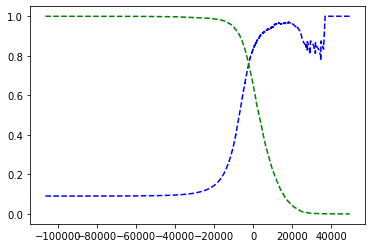

In [48]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    [...]
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [49]:
# Suppose aim for 90% Precision

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

In [52]:
# To make predictions instead of calling the predict() method

y_train_pred_90 = (y_scores >= threshold_90_precision)
#y_train_pred_90

# 90% precision
precision_score(y_train_5, y_train_pred_90)

# 48% recall
recall_score(y_train_5, y_train_pred_90)

# NOTE: When Precision was 83%, Recall was 65%, when Precision was 90%, Recall fell to 48%

0.4799852425751706

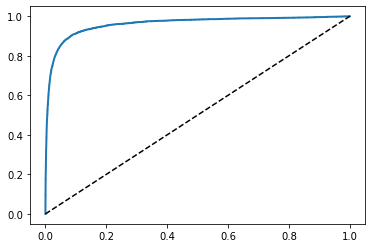

In [54]:
# ROC Curve (Receiver Operating Characteristic)
# instead of precision v recall
# ROC Curve plots True Positive Rate (tpr) against False Positive Rate (fpr)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    [...]
    
plot_roc_curve(fpr, tpr)
plt.show()


In [ ]:
# Another metric is Area Under the Curve (AUC), 1 = perfect

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)



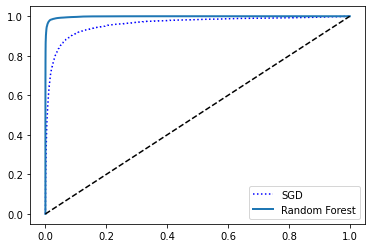

In [62]:
# Compare SGD vs RandomForest

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [63]:
# notice ROC AUC score for Random Forest is better than SGD

roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [65]:
# Multiclass Classification
# with Support Vector Machine Classifier

# Note: this trains 45 binary classifiers, so it's SLOWWWWWWWW

from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # not y_train_5
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [23]:
#########################
##### FAST VERSION  ##### 
#########################

# Multiclass Classification
# with Support Vector Machine Classifier

# Note: FASTER because training data has been reduced to 2000

from sklearn.svm import SVC

svm_clf = SVC()

svm_clf.fit(X_train1, y_train1) # not y_train_5
svm_clf.predict([some_digit])


array([5], dtype=uint8)

In [67]:
# above, it trained 45 binary classifiers, got their decision scores for the image,
# selected the class that won the most duel "5"

# use decision_function() to see that fifth digit had highest decision score

some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

np.argmax(some_digit_scores)

5

In [ ]:
# Scaling Inputs --- TOO SLOW

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [24]:
##################################################
##### FAST VERSION (Multi-class Classification) ##
##################################################

# Scaling Inputs --- SHould be faster


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train1, cv=3, scoring="accuracy")

array([0.85907046, 0.8185907 , 0.85435435])

In [25]:
##################################################
##### FAST VERSION (Multi-class Classification) ##
##################################################

y_train_pred_f = cross_val_predict(sgd_clf, X_train_scaled, y_train1, cv=3)
conf_mx = confusion_matrix(y_train1, y_train_pred_f)
conf_mx


array([[178,   0,   2,   1,   0,   8,   1,   0,   1,   0],
       [  0, 196,   2,   0,   1,   5,   1,   2,  13,   0],
       [  4,   3, 166,   0,   5,   1,   4,   5,   8,   2],
       [  1,   1,  10, 154,   0,  10,   1,   5,   6,   3],
       [  1,   1,   5,   1, 183,   0,   5,   1,   4,  13],
       [  3,   1,   3,  10,   7, 130,   5,   4,  11,   6],
       [  4,   2,   3,   0,   4,   3, 181,   0,   3,   0],
       [  2,   2,   3,   3,   7,   0,   0, 194,   2,  11],
       [  2,   6,   5,   4,   1,   9,   1,   1, 136,   7],
       [  4,   0,   3,   4,  10,   3,   0,  15,   1, 170]])

<function matplotlib.pyplot.show(*args, **kw)>

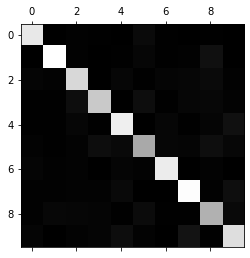

In [26]:
##### FAST VERSION (Multi-class Classification) ##

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show

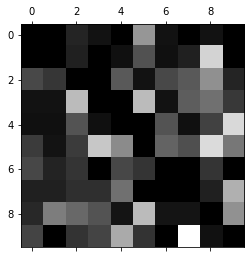

In [28]:
##### FAST VERSION (Multi-class Classification) ##

### ERROR ANALYSIS ###

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [72]:
# Multi-Label Classification
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [73]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

In [29]:
##################################################
##### FAST VERSION (Multi-Label Classification) ##
##################################################

# Multi-Label Classification
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train1 >= 7)
y_train_odd = (y_train1 % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train1, y_multilabel)



KNeighborsClassifier()

In [30]:
## FASTER

knn_clf.predict([some_digit])

array([[False,  True]])

In [37]:
## FASTER

y_train_knn_pred = cross_val_predict(knn_clf, X_train1, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9176605556691428

In [38]:
##################################################
##### FAST VERSION (Multi-Output Classification) ##
##################################################


noise = np.random.randint(0,100, (len(X_train1), 784))
X_train_mod = X_train1 + noise
noise = np.random.randint(0,100, (len(X_test1), 784))
X_test_mod = X_test1 + noise
y_train_mod = X_train1
y_test_mod = X_test1

In [47]:
# EXTRA - from Hands-on-ML jupyter notebook

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

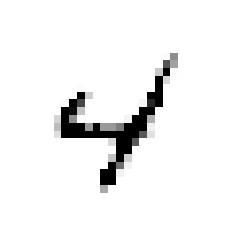

In [49]:


knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[5]])
plot_digits(clean_digit)